# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | puerto aysen
Processing Record 7 of Set 1 | ola
Processing Record 8 of Set 1 | siverek
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | yagry
City not found. Skipping...
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | midvagur
Processing Record 15 of Set 1 | gargalianoi
Processing Record 16 of Set 1 | novyy urgal
Processing Record 17 of Set 1 | port saint john's
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | vila franca do campo
Processing Recor

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,9.12,74,75,3.60,CA,1696110670
1,waitangi,-43.9535,-176.5597,11.01,77,89,4.02,NZ,1696110822
2,port-aux-francais,-49.3500,70.2167,4.54,97,100,12.98,TF,1696110823
3,albany,42.6001,-73.9662,19.21,87,79,0.45,US,1696110621
4,college,64.8569,-147.8028,9.00,51,75,5.14,US,1696110823


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,9.12,74,75,3.60,CA,1696110670
1,waitangi,-43.9535,-176.5597,11.01,77,89,4.02,NZ,1696110822
2,port-aux-francais,-49.3500,70.2167,4.54,97,100,12.98,TF,1696110823
3,albany,42.6001,-73.9662,19.21,87,79,0.45,US,1696110621
4,college,64.8569,-147.8028,9.00,51,75,5.14,US,1696110823


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

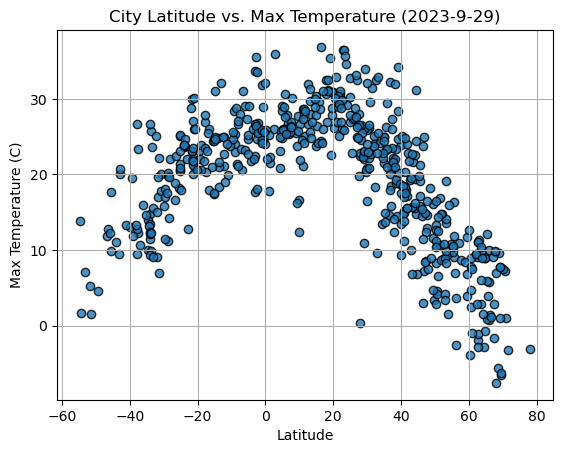

In [33]:
# Build scatter plot for latitude vs. temperature
fig, ax1 = plt.subplots()
ax1.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.8,edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-9-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
ax1.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

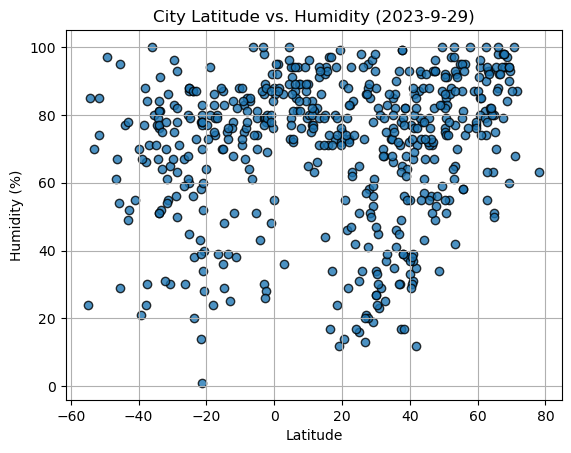

In [34]:
# Build the scatter plots for latitude vs. humidity
fig, ax2 = plt.subplots()
ax2.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.8,edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-9-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
ax2.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

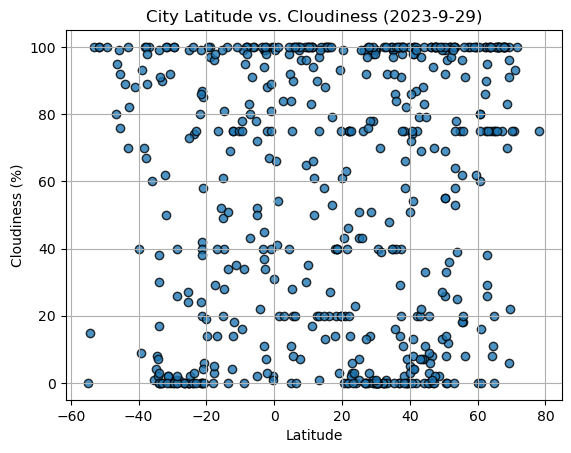

In [35]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax3 = plt.subplots()
ax3.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.8,edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-9-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax3.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

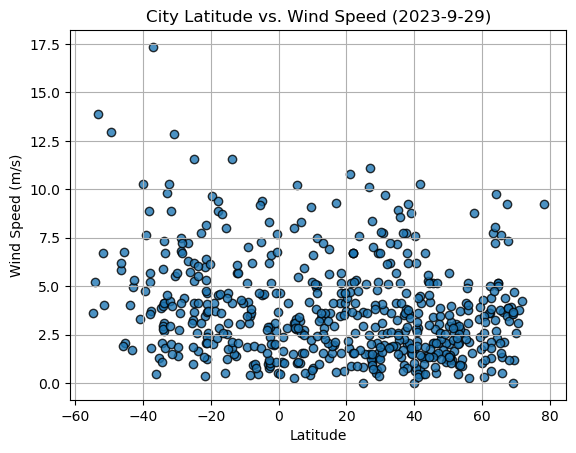

In [36]:
# Build the scatter plots for latitude vs. wind speed
fig, ax4 = plt.subplots()
ax4.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.8,edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-9-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
ax4.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def linear_regression(x_value, y_value,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq, (x_value.min(),y_value.min()), fontsize= 15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f'The r-value is: {rvalue}')
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,9.12,74,75,3.60,CA,1696110670
3,albany,42.6001,-73.9662,19.21,87,79,0.45,US,1696110621
4,college,64.8569,-147.8028,9.00,51,75,5.14,US,1696110823
6,ola,59.5833,151.2833,3.97,77,100,1.77,RU,1696110824
7,siverek,37.7550,39.3167,21.27,65,98,2.00,TR,1696110825


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,11.01,77,89,4.02,NZ,1696110822
2,port-aux-francais,-49.3500,70.2167,4.54,97,100,12.98,TF,1696110823
5,puerto aysen,-45.4000,-72.7000,9.88,95,76,2.06,CL,1696110824
8,puerto natales,-51.7236,-72.4875,5.25,74,100,6.70,CL,1696110825
9,margaret river,-33.9500,115.0667,14.76,76,99,7.33,AU,1696110825


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8026951787938559


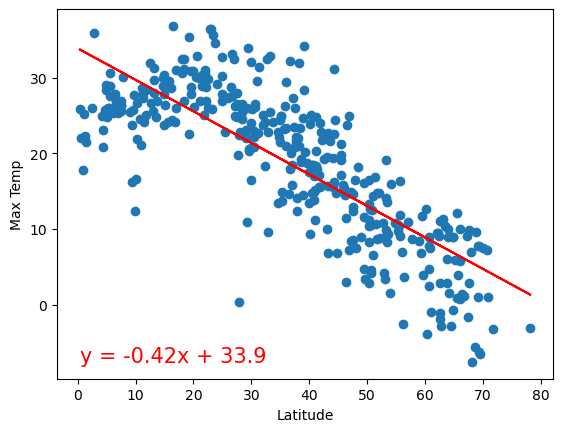

In [54]:
linear_regression(x_value = northern_hemi_df["Lat"], y_value = northern_hemi_df["Max Temp"], xlabel = "Latitude", ylabel = "Max Temp")

The r-value is: -0.8026951787938559


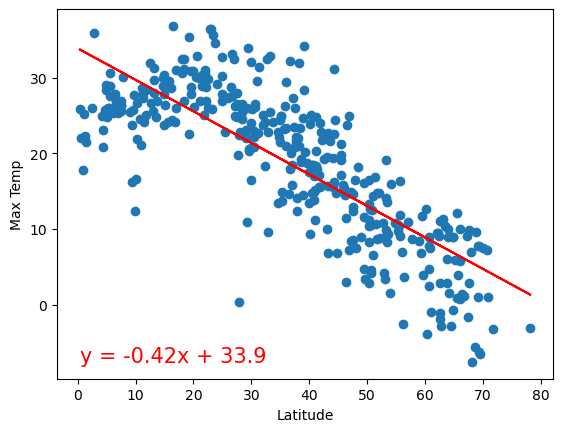

In [55]:
# Linear regression on Northern Hemisphere
linear_regression(x_value = northern_hemi_df["Lat"], y_value = northern_hemi_df["Max Temp"], xlabel = "Latitude", ylabel = "Max Temp")

The r-value is: 0.7470550393808352


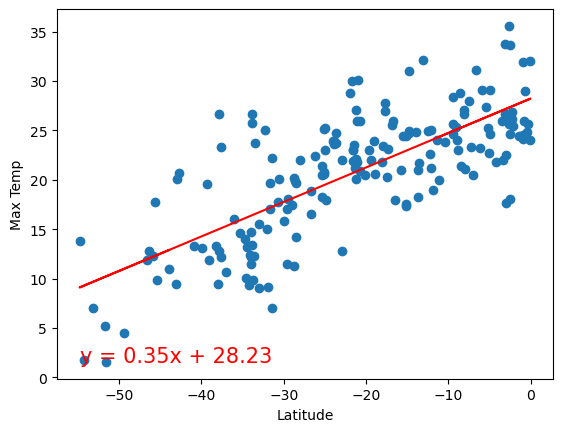

In [57]:
# Linear regression on Southern Hemisphere
linear_regression(x_value = southern_hemi_df["Lat"], y_value = southern_hemi_df["Max Temp"], xlabel = "Latitude", ylabel = "Max Temp")

**Discussion about the linear relationship:** From the both linear regression plots, we could see that the latitude and max temperature have a pretty strong association.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09711454837598586


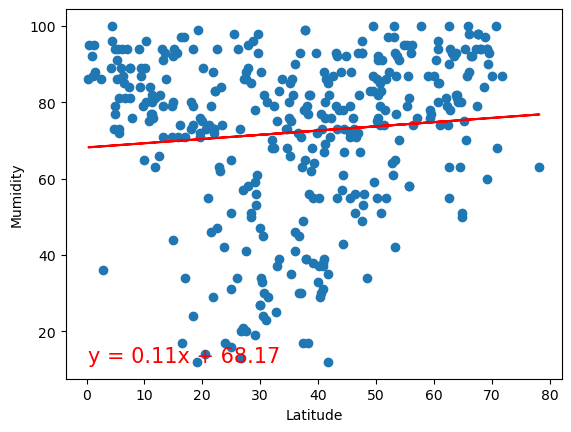

In [59]:
# Northern Hemisphere
linear_regression(x_value = northern_hemi_df["Lat"], y_value = northern_hemi_df["Humidity"], xlabel = "Latitude", ylabel = "Mumidity")

The r-value is: 0.12273796246944538


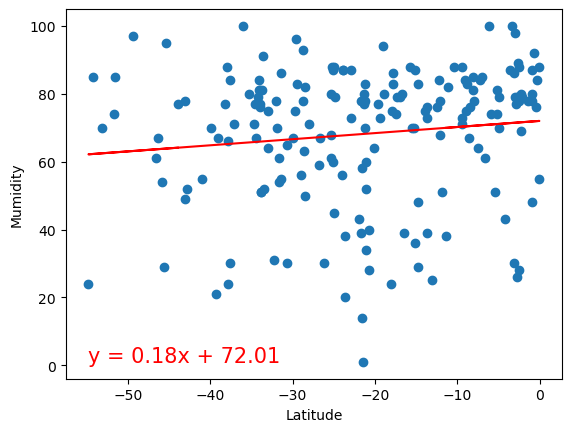

In [60]:
# Southern Hemisphere
linear_regression(x_value = southern_hemi_df["Lat"], y_value = southern_hemi_df["Humidity"], xlabel = "Latitude", ylabel = "Mumidity")

**Discussion about the linear relationship:** From the plots, we can see that the points are everywhere around the plots. Also, the r-values are close to 0. So latitude and mumidity of these data groups have no relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09799925920209143


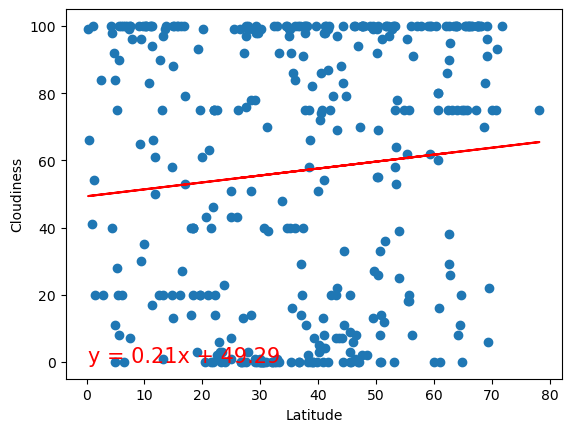

In [63]:
# Northern Hemisphere
linear_regression(x_value = northern_hemi_df["Lat"], y_value = northern_hemi_df["Cloudiness"], xlabel = "Latitude", ylabel = "Cloudiness")

The r-value is: 0.05713227007469266


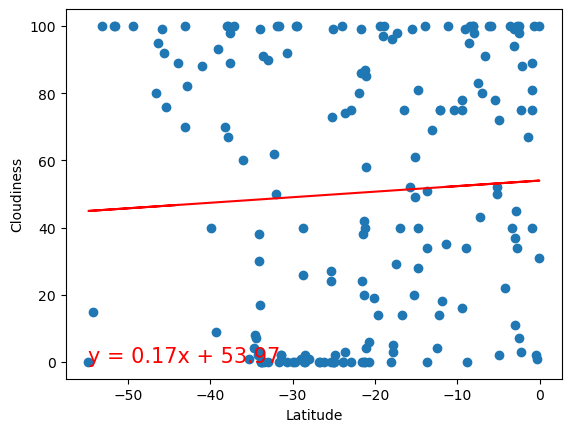

In [64]:
# Southern Hemisphere
linear_regression(x_value = southern_hemi_df["Lat"], y_value = southern_hemi_df["Cloudiness"], xlabel = "Latitude", ylabel = "Cloudiness")

**Discussion about the linear relationship:** From the plots, we can see that the points are everywhere around the plots. Also, the r-values are close to 0. So latitude and cloudiness of these data groups have no relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.033537349154561


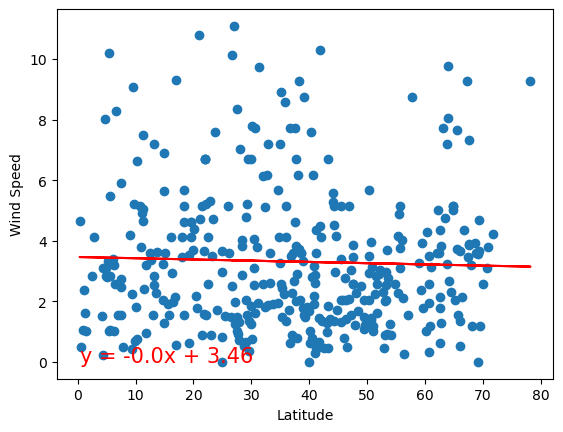

In [67]:
# Northern Hemisphere
linear_regression(x_value = northern_hemi_df["Lat"], y_value = northern_hemi_df["Wind Speed"], xlabel = "Latitude", ylabel = "Wind Speed")

The r-value is: -0.2544311895133761


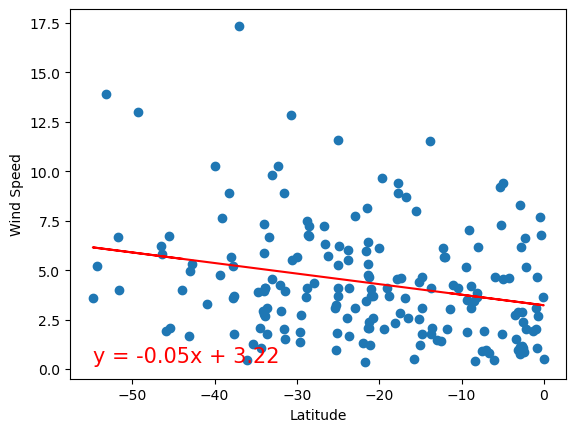

In [68]:
# Southern Hemisphere
linear_regression(x_value = southern_hemi_df["Lat"], y_value = southern_hemi_df["Wind Speed"], xlabel = "Latitude", ylabel = "Wind Speed")

**Discussion about the linear relationship:** From the plots, we can see that the points are everywhere around the plots. Also, the r-values are close to 0. So latitude and wind speed of these data groups have no relationship.